## 1. Data Understanding & Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 

from sklearn import metrics

In [2]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

In [3]:
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
# pd.set_option('display.max_rows', None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
List_Of_Designation = list(df['Designation'].unique())

In [7]:
for i in List_Of_Designation:
    print(i)

Manager
Executive
Senior Manager
AVP
VP


In [8]:
for i in List_Of_Designation:
    Average_executive_monthly_income = df[(df['Designation'] == i) & df['MonthlyIncome']]
    print("Average monthly income for designation {} is {:.2f}".format(i, Average_executive_monthly_income['MonthlyIncome'].sum()/len(Average_executive_monthly_income['MonthlyIncome'])))

Average monthly income for designation Manager is 22643.16
Average monthly income for designation Executive is 19939.92
Average monthly income for designation Senior Manager is 26637.75
Average monthly income for designation AVP is 32241.05
Average monthly income for designation VP is 35878.95


In [9]:
Average_executive_monthly_income['MonthlyIncome'].sum()/len(Average_executive_monthly_income['MonthlyIncome'])

35878.94782608696

In [10]:
for column_name in df.columns:
    missing_percentage = (df[column_name].isnull().sum() / len(df[column_name])) * 100
    print("Missing percentage for column {} ==> {:.2f}%".format(column_name, missing_percentage))


Missing percentage for column CustomerID ==> 0.00%
Missing percentage for column ProdTaken ==> 0.00%
Missing percentage for column Age ==> 4.62%
Missing percentage for column TypeofContact ==> 0.51%
Missing percentage for column CityTier ==> 0.00%
Missing percentage for column DurationOfPitch ==> 5.14%
Missing percentage for column Occupation ==> 0.00%
Missing percentage for column Gender ==> 0.00%
Missing percentage for column NumberOfPersonVisiting ==> 0.00%
Missing percentage for column NumberOfFollowups ==> 0.92%
Missing percentage for column ProductPitched ==> 0.00%
Missing percentage for column PreferredPropertyStar ==> 0.53%
Missing percentage for column MaritalStatus ==> 0.00%
Missing percentage for column NumberOfTrips ==> 2.86%
Missing percentage for column Passport ==> 0.00%
Missing percentage for column PitchSatisfactionScore ==> 0.00%
Missing percentage for column OwnCar ==> 0.00%
Missing percentage for column NumberOfChildrenVisiting ==> 1.35%
Missing percentage for colum

 1. Out of all, only 5.14% Sales Pitch duration data is missing.
 2. Also, 4.77% data are missing of people's monthly income as well as Age data for 4.62% people are missing.
 3. Remaining columns has missing value percentage below 3% which is minimal, so we can ignore them as it will not affect the data much.

In [11]:
print("Number of unique values in the respective columns:")
print("--"*25)
for column_name in df.columns: 
    print("{} {}".format(column_name,len(df[column_name].unique())))

Number of unique values in the respective columns:
--------------------------------------------------
CustomerID 4888
ProdTaken 2
Age 45
TypeofContact 3
CityTier 3
DurationOfPitch 35
Occupation 4
Gender 3
NumberOfPersonVisiting 5
NumberOfFollowups 7
ProductPitched 5
PreferredPropertyStar 4
MaritalStatus 4
NumberOfTrips 13
Passport 2
PitchSatisfactionScore 5
OwnCar 2
NumberOfChildrenVisiting 5
Designation 5
MonthlyIncome 2476


In [12]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [13]:
df.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


1. Maximum duration of pitch is 127 minute i.e. 2 Hour 7 Minute and Minimum duration of pitch is 5 Minute
2. Most of the people has taken the package of tourism
3. Average person data present in this tourism.xlsx file is of age 36.
4. Average number of families consist of 3 members.
5. According to the data, most of the follow ups taken after sales speech is 2.
6. 50% of the people were from 1 tier city.

In [14]:
for column_name in df.columns:
    if df[column_name].dtype == 'object':    
        print("   Listing out categorical variables of {} and it's value count".format(column_name))
        Unique_Category = list(df[column_name].unique())
        for category_name in Unique_Category:  
            print("-->{} {}".format(category_name,df[column_name].value_counts().get(category_name)))
        print("="*20)

   Listing out categorical variables of TypeofContact and it's value count
-->Self Enquiry 3444
-->Company Invited 1419
-->nan None
   Listing out categorical variables of Occupation and it's value count
-->Salaried 2368
-->Free Lancer 2
-->Small Business 2084
-->Large Business 434
   Listing out categorical variables of Gender and it's value count
-->Female 1817
-->Male 2916
-->Fe Male 155
   Listing out categorical variables of ProductPitched and it's value count
-->Deluxe 1732
-->Basic 1842
-->Standard 742
-->Super Deluxe 342
-->King 230
   Listing out categorical variables of MaritalStatus and it's value count
-->Single 916
-->Divorced 950
-->Married 2340
-->Unmarried 682
   Listing out categorical variables of Designation and it's value count
-->Manager 1732
-->Executive 1842
-->Senior Manager 742
-->AVP 342
-->VP 230


Here we found that :
1. TypeContract column nan value so it also forms different category, so we will impute this column.
2. Gender column has third category which is Fe male, as we all know that it should be Female. So we will just replace this third category with Female.

In [15]:
df['Gender'] = df['Gender'].apply(lambda x: "Female" if x=='Fe Male' else x)

In [16]:
df['TypeofContact'].isna().sum()

25

As we know that, there are 25 null values in the TypeContract. So to handle it carefully, we can consider the max category from this column.

In [17]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [18]:
# df['TypeofContact'].fillna("Self Enquiry", inplace=True)

In [19]:
# df['TypeofContact'].isna().sum()

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = df[column].astype('category')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

## 2. Data Exploration & Analysis

In [22]:
copy_df = df.copy()

In [23]:
copy_df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Univariate Analysis

## Categorical Column

<Axes: xlabel='ProdTaken', ylabel='count'>

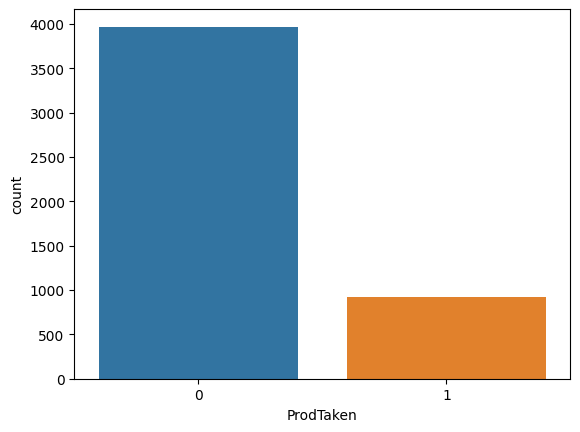

In [24]:
sns.countplot(copy_df, x="ProdTaken")

   Out of the 5000 people, less than 1000 has bought the product

<Axes: xlabel='TypeofContact', ylabel='count'>

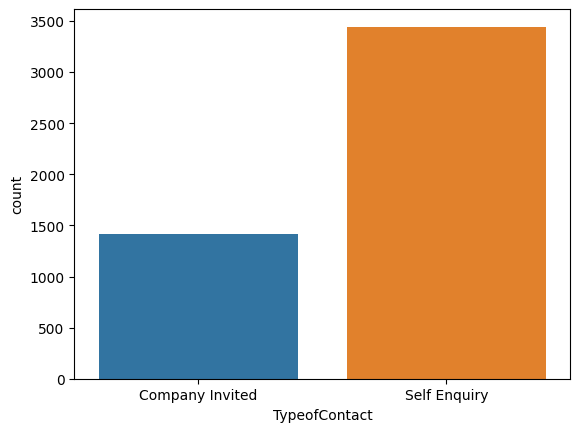

In [25]:
sns.countplot(copy_df, x='TypeofContact')

Most of the people were came by themself but not when the company invited them

<Axes: xlabel='CityTier', ylabel='count'>

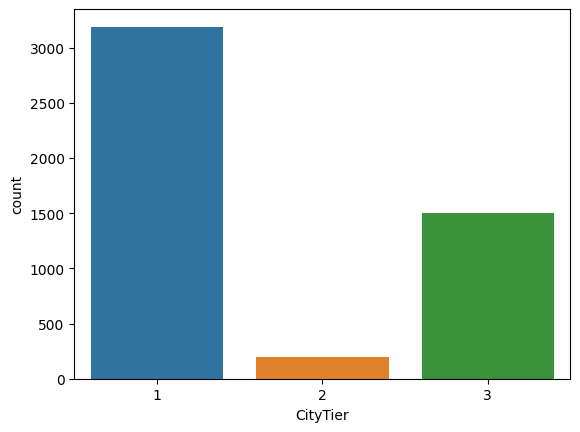

In [26]:
sns.countplot(copy_df, x='CityTier')

Many people were from City Tier 1

<Axes: xlabel='Occupation', ylabel='count'>

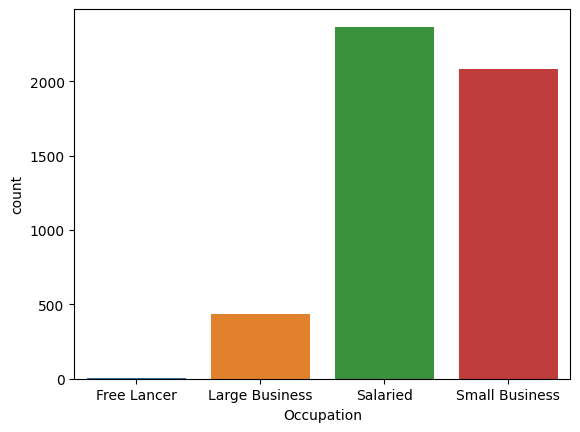

In [27]:
sns.countplot(copy_df, x='Occupation')

Large amount of people who are in the database of this company, are working as an employee. While, some of them were having small business or large business and only few people are working as freelancer.

<Axes: xlabel='Gender', ylabel='count'>

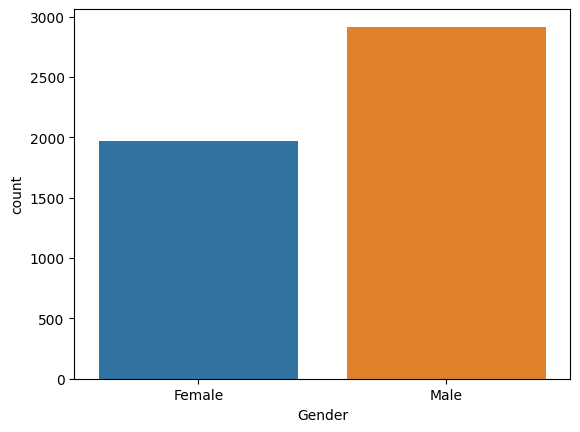

In [28]:
sns.countplot(copy_df, x='Gender')

Most of the person were Male.

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

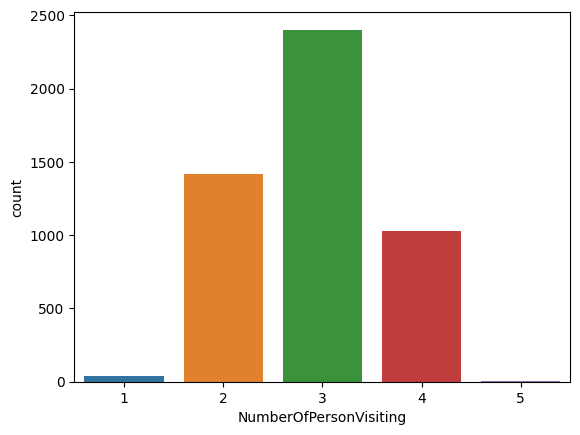

In [29]:
sns.countplot(copy_df, x='NumberOfPersonVisiting')
df['NumberOfPersonVisiting'].value_counts()

It seems like, most of them were family as group of 3 member is more.

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

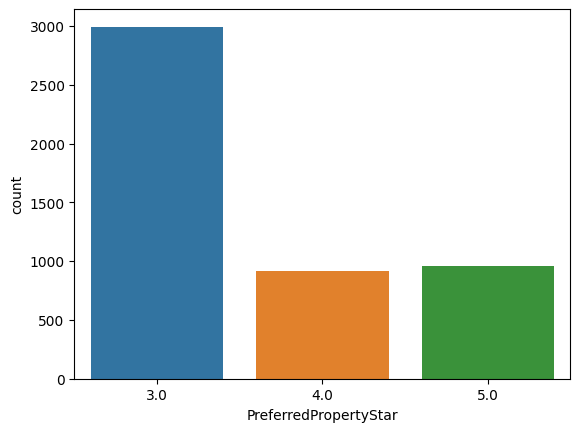

In [30]:
sns.countplot(copy_df, x="PreferredPropertyStar")

Most of the person preferred 3 star property.

<Axes: xlabel='MaritalStatus', ylabel='count'>

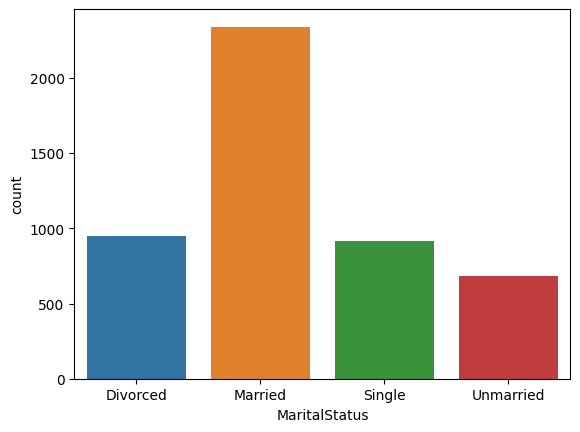

In [31]:
sns.countplot(copy_df, x='MaritalStatus')

Most of the people were married and only few of the persons were Unmarried

<Axes: xlabel='NumberOfTrips', ylabel='count'>

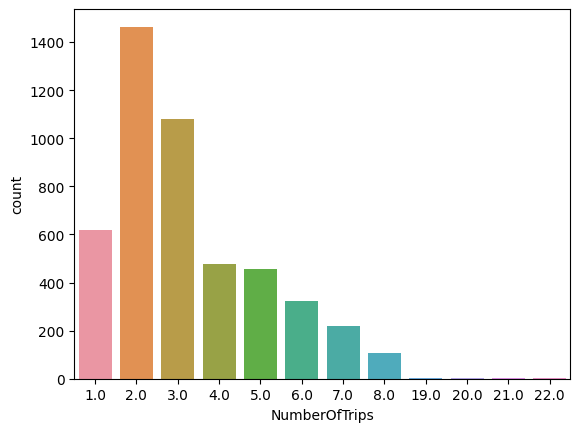

In [32]:
sns.countplot(copy_df, x='NumberOfTrips')

Most of the people preferred trip second times.

<Axes: xlabel='Passport', ylabel='count'>

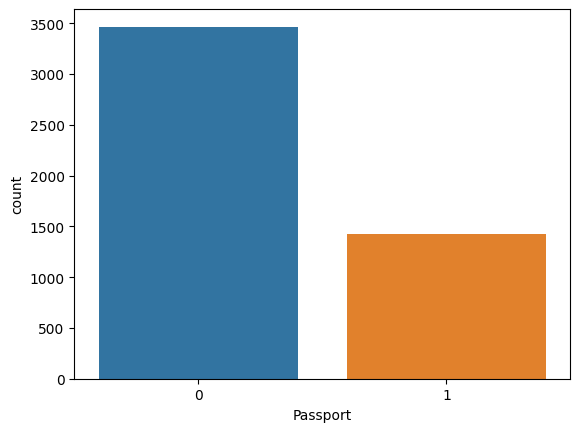

In [33]:
sns.countplot(copy_df, x='Passport')

Less than 1500 people were having passport.

<Axes: xlabel='OwnCar', ylabel='count'>

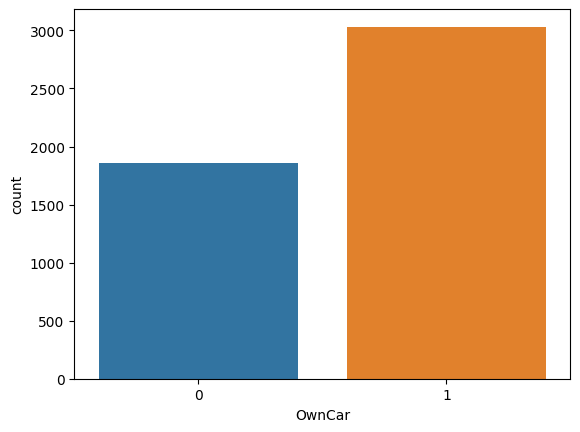

In [34]:
sns.countplot(copy_df, x='OwnCar')

Almost each and every person were having their own car

<Axes: xlabel='NumberOfChildrenVisiting', ylabel='count'>

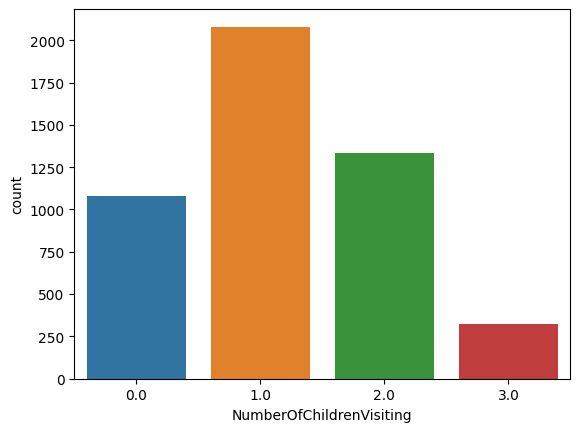

In [35]:
sns.countplot(copy_df, x='NumberOfChildrenVisiting')

Many familier were having only 1 children

<Axes: xlabel='Designation', ylabel='count'>

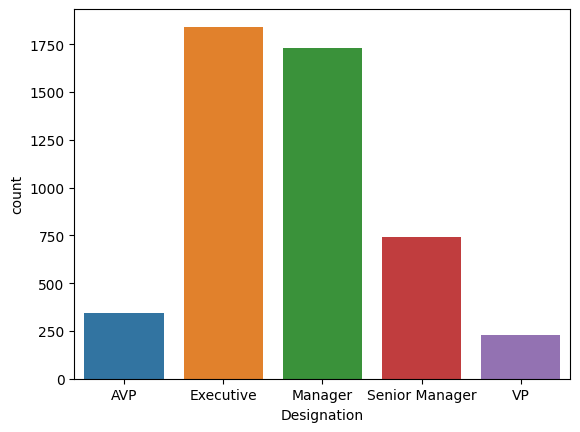

In [36]:
sns.countplot(copy_df, x='Designation')

It seems like, many of the people were at the executive designation

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

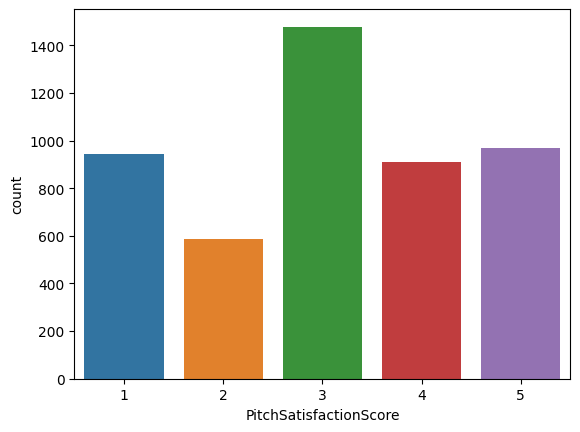

In [37]:
sns.countplot(copy_df, x='PitchSatisfactionScore')  

Most of the pitches were having satisfaction score of 3.

<Axes: xlabel='ProductPitched', ylabel='count'>

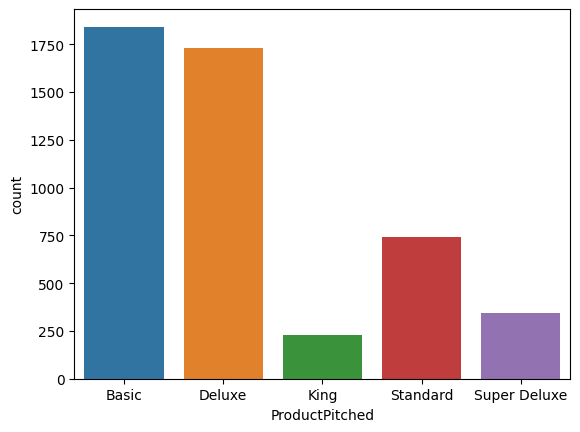

In [38]:
sns.countplot(copy_df, x='ProductPitched')  

The pitched amount of Basic was high as compared to King. 

<Axes: xlabel='NumberOfFollowups', ylabel='count'>

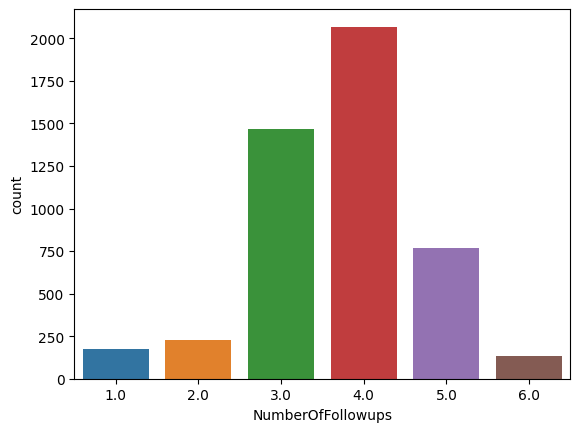

In [39]:
sns.countplot(copy_df, x='NumberOfFollowups')

After most of the pitch, upto 4 follow ups were taken.

## Below mentioned columns were categorical so we have used countplot:-
1. ProdTaken 
2. TypeofContact 
3. CityTier
4. Occupation
5. Gender
6. NumberofPersonVisiting
7. PreferredPropertyStar
8. MaritalStatus
9. NumberofTrips
10. Passport
11. OwnCar
12. NumberofChildrenVisiting
13. Designation
14. PitchSatisfactionScore
15. ProductPitched
16. NumberOfFollowups

## Numerical Column

<Axes: xlabel='Age'>

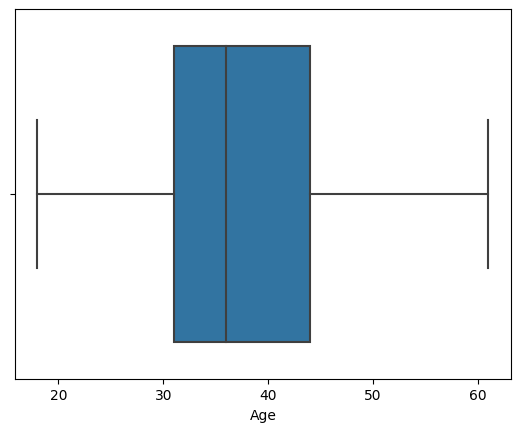

In [40]:
sns.boxplot(copy_df, x='Age')

Age data is normal and there is no outlier present in the Age column

<Axes: xlabel='MonthlyIncome'>

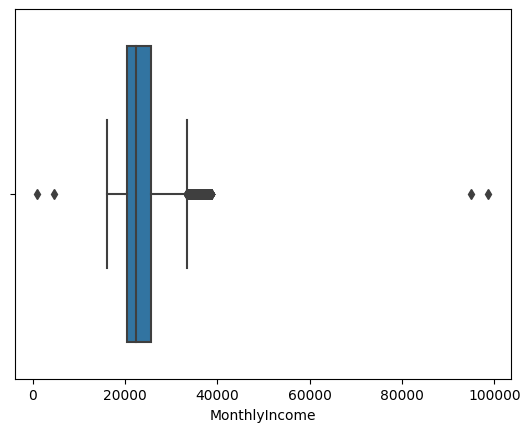

In [41]:
sns.boxplot(copy_df, x='MonthlyIncome')

If we talk about monthly income, then there are few data points which are plotted above 80,000. So further on we can decide to remove it or remain it. Moreover, we can also decide to keep it as it is because in real world also people can have monthly income more than 80,000.

<Axes: xlabel='DurationOfPitch'>

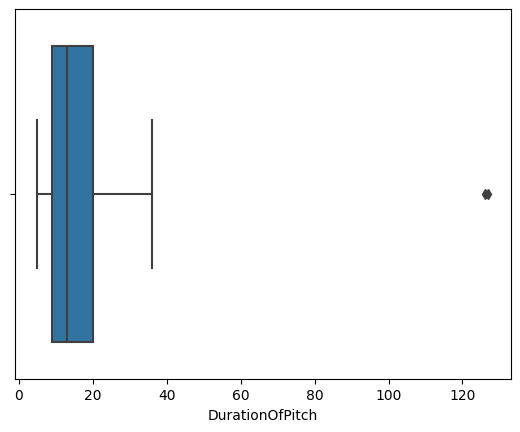

In [42]:
sns.boxplot(copy_df, x='DurationOfPitch')

In [43]:
Higher_Duration_Of_Pitch = copy_df[(copy_df['DurationOfPitch'] > 100)]

In [44]:
Higher_Duration_Of_Pitch

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


Here, we can say that there were two speech which duration has exceeded 1 hour.

## Handling outliers by imputing them

As we can see above that two values of MonthylIncome are more than 80,000. So what can we do is we can apply clipping method so replacing income values more than 80000 with some threshold.

In [45]:
copy_df[copy_df['MonthlyIncome']> 80000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [46]:
mean_of_monthly_income = round(copy_df['MonthlyIncome'].mean())
copy_df['MonthlyIncome'].fillna(mean_of_monthly_income, inplace=True)

Q1 = np.percentile(copy_df['MonthlyIncome'], 25)
Q3 = np.percentile(copy_df['MonthlyIncome'], 75)
IQR = Q3 - Q1

# Calculate the IQR 3 bounds
lower_bound = Q1 - (3 * IQR)
upper_bound = Q3 + (3 * IQR)
print("Lower bound {}".format(lower_bound))
print("Upper bound {}".format(upper_bound))

Lower bound 5665.75
Upper bound 40244.0


We're going to replace every monthly income which is more than 40244 with 40244. After, doing this we'll not see any outlier.

In [47]:
copy_df['MonthlyIncome'] = copy_df['MonthlyIncome'].apply(lambda x: upper_bound if x > upper_bound else x)
copy_df['MonthlyIncome'] = copy_df['MonthlyIncome'].apply(lambda x: lower_bound if x < lower_bound else x)

<Axes: xlabel='MonthlyIncome'>

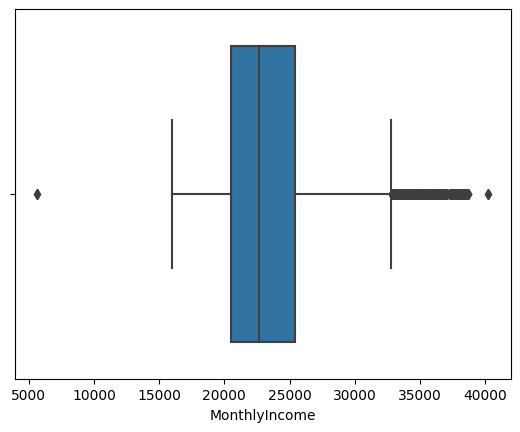

In [48]:
sns.boxplot(copy_df, x='MonthlyIncome')

we have safely handled the outliers in the MonthlyIncome column. 

In [49]:
mean_of_duration_of_income = round(copy_df['DurationOfPitch'].mean())
copy_df['DurationOfPitch'].fillna(mean_of_duration_of_income, inplace=True)

Q1 = np.percentile(copy_df['DurationOfPitch'], 25)
Q3 = np.percentile(copy_df['DurationOfPitch'], 75)
IQR = Q3 - Q1

# Calculate the IQR 3 bounds
lower_bound = Q1 - (3 * IQR)
upper_bound = Q3 + (3 * IQR)
print("Lower bound {}".format(lower_bound))
print("Upper bound {}".format(upper_bound))

Lower bound -21.0
Upper bound 49.0


DurationofSpeech column has only few values as an outlier

In [50]:
Duration_Of_Speech_outliers = list(copy_df[copy_df['DurationOfPitch'] > upper_bound].index)

so we'll remove this rows

In [51]:
copy_df.drop( axis=1, index=Duration_Of_Speech_outliers, inplace=True)

In [52]:
copy_df.isna().sum()

ProdTaken                     0
Age                         225
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome                 0
dtype: int64

In [53]:
#Imputing the nan values in the columns

In [54]:
Mean_Age = round(copy_df['Age'].mean())
copy_df['Age'].fillna(Mean_Age, inplace=True)

In [55]:
Mean_NumberOfFollowUps = round(copy_df['NumberOfFollowups'].mean())
copy_df['NumberOfFollowups'].fillna(Mean_NumberOfFollowUps, inplace=True)

In [56]:
Mean_NumberOfChildrenVisiting = round(copy_df['NumberOfChildrenVisiting'].mean())
copy_df['NumberOfChildrenVisiting'].fillna(Mean_NumberOfChildrenVisiting, inplace=True)

In [57]:
Mean_NumberOfTrips = round(copy_df['NumberOfTrips'].mean())
copy_df['NumberOfTrips'].fillna(Mean_NumberOfTrips, inplace=True)

In [58]:
copy_df.loc[copy_df['PreferredPropertyStar'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,40244.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


 Here, we saw that almost more than 95% empty rows has the designation of VP. So we will take the maximum preferred star given my VP and give it to the remaining nan values.

In [59]:
copy_df[(copy_df['Designation']=='VP')]['PreferredPropertyStar'].value_counts()

3.0    137
4.0     41
5.0     29
Name: PreferredPropertyStar, dtype: int64

In [60]:
# Here, we're replacing Nan values in PreferredPropertyStar 
copy_df['PreferredPropertyStar'].fillna(3.0, inplace=True)

In [61]:
copy_df.isna().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

Now our data is clear so we'll move forward with bivariate analysis

## Bivariate Analysis

In [62]:
copy_df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [63]:
# Categorical - Categorical 
pd.crosstab(copy_df[ "ProductPitched"],copy_df[ "ProdTaken"])

ProdTaken,0,1
ProductPitched,,
Basic,1288,552
Deluxe,1528,204
King,210,20
Standard,618,124
Super Deluxe,322,20


We can see that Basic Product is bought more

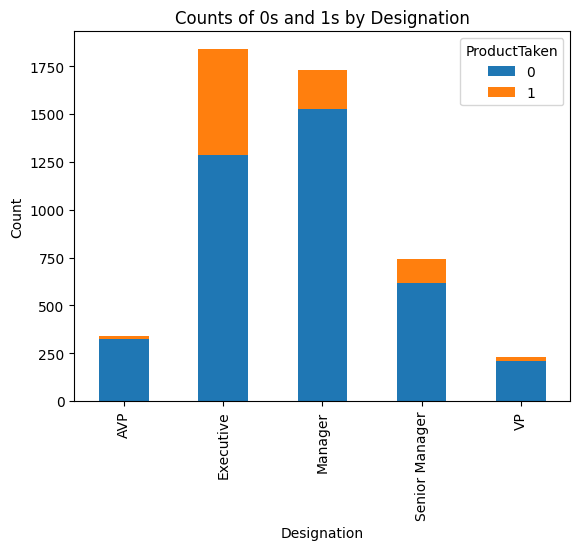

In [64]:
# sns.barplot(copy_df, x='Designation',y='ProdTaken')

# Group the data by 'Designation' and count the occurrences of 0 and 1
grouped = copy_df.groupby(['Designation', 'ProdTaken']).size().unstack(fill_value=0)

# Create a grouped bar chart
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Counts of 0s and 1s by Designation')
plt.legend(title='ProductTaken', labels=['0', '1'])
plt.show()

People who are working as Executive are more likely to buy the product.

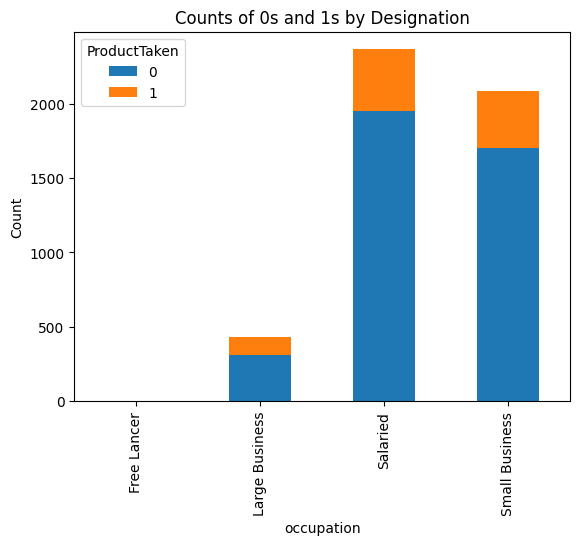

In [65]:
# Group the data by 'Designation' and count the occurrences of 0 and 1
grouped = copy_df.groupby(['Occupation', 'ProdTaken']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Counts of 0s and 1s by Designation')
plt.legend(title='ProductTaken', labels=['0', '1'])
plt.show()

Salaried & Small Business people are more likely to buy the product

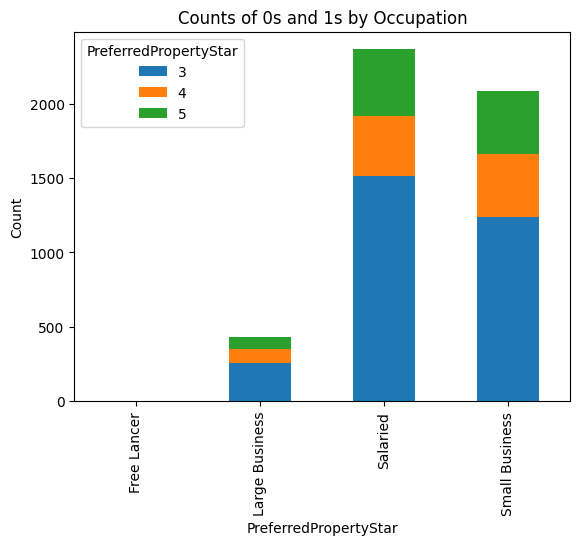

In [66]:
grouped = copy_df.groupby(['Occupation', 'PreferredPropertyStar']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('PreferredPropertyStar')
plt.ylabel('Count')
plt.title('Counts of 0s and 1s by Occupation')
plt.legend(title='Occupation', labels=['3', '4', '5'])
plt.show()

Salaried people & Small Business people are more preferring 3 star property. 

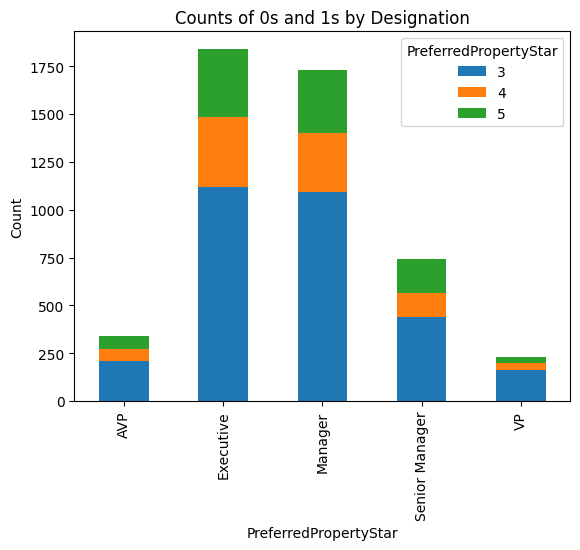

In [67]:
grouped = copy_df.groupby(['Designation', 'PreferredPropertyStar']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('PreferredPropertyStar')
plt.ylabel('Count')
plt.title('Counts of 0s and 1s by Designation')
plt.legend(title='Designation', labels=['3', '4', '5'])
plt.show()

People who are working as Executive & Manager prefer more 3 star property. So we can keep this point in mind when pitching products.

## Multivariate Analysis

In [68]:
# Here we will split out categorical and numerical column for doing analysis steps

categorical_columns = copy_df.select_dtypes(include=['category', 'object'])
categorical_df = copy_df[categorical_columns.columns]

numerical_columns = copy_df.select_dtypes(include=['int64', 'float64'])
numerical_df = copy_df[numerical_columns.columns]


In [69]:
categorical_df

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [70]:
numerical_df

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,38.0,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [71]:
# X = numerical_df.iloc[:,:]

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# n_components = 2  # Replace with the desired number of components
# pca = PCA(n_components=n_components)
# principal_components = pca.fit_transform(X_std)

# explained_variance = pca.explained_variance_ratio_
# print("Explained Variance Ratio:", explained_variance)

# pca_df = pd.DataFrame(data=principal_components, columns=['NumberOfTrips', 'MonthlyIncome'])  # Change column names as needed
# plt.scatter(pca_df['NumberOfTrips'], pca_df['MonthlyIncome'])
# plt.xlabel('NumberOfTrips')
# plt.ylabel('MonthlyIncome')
# plt.title('PCA - First Two Principal Components')
# plt.show()

# selected_pca = PCA(n_components=2)  # Adjust the number of components
# transformed_data = selected_pca.fit_transform(X_std)


C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


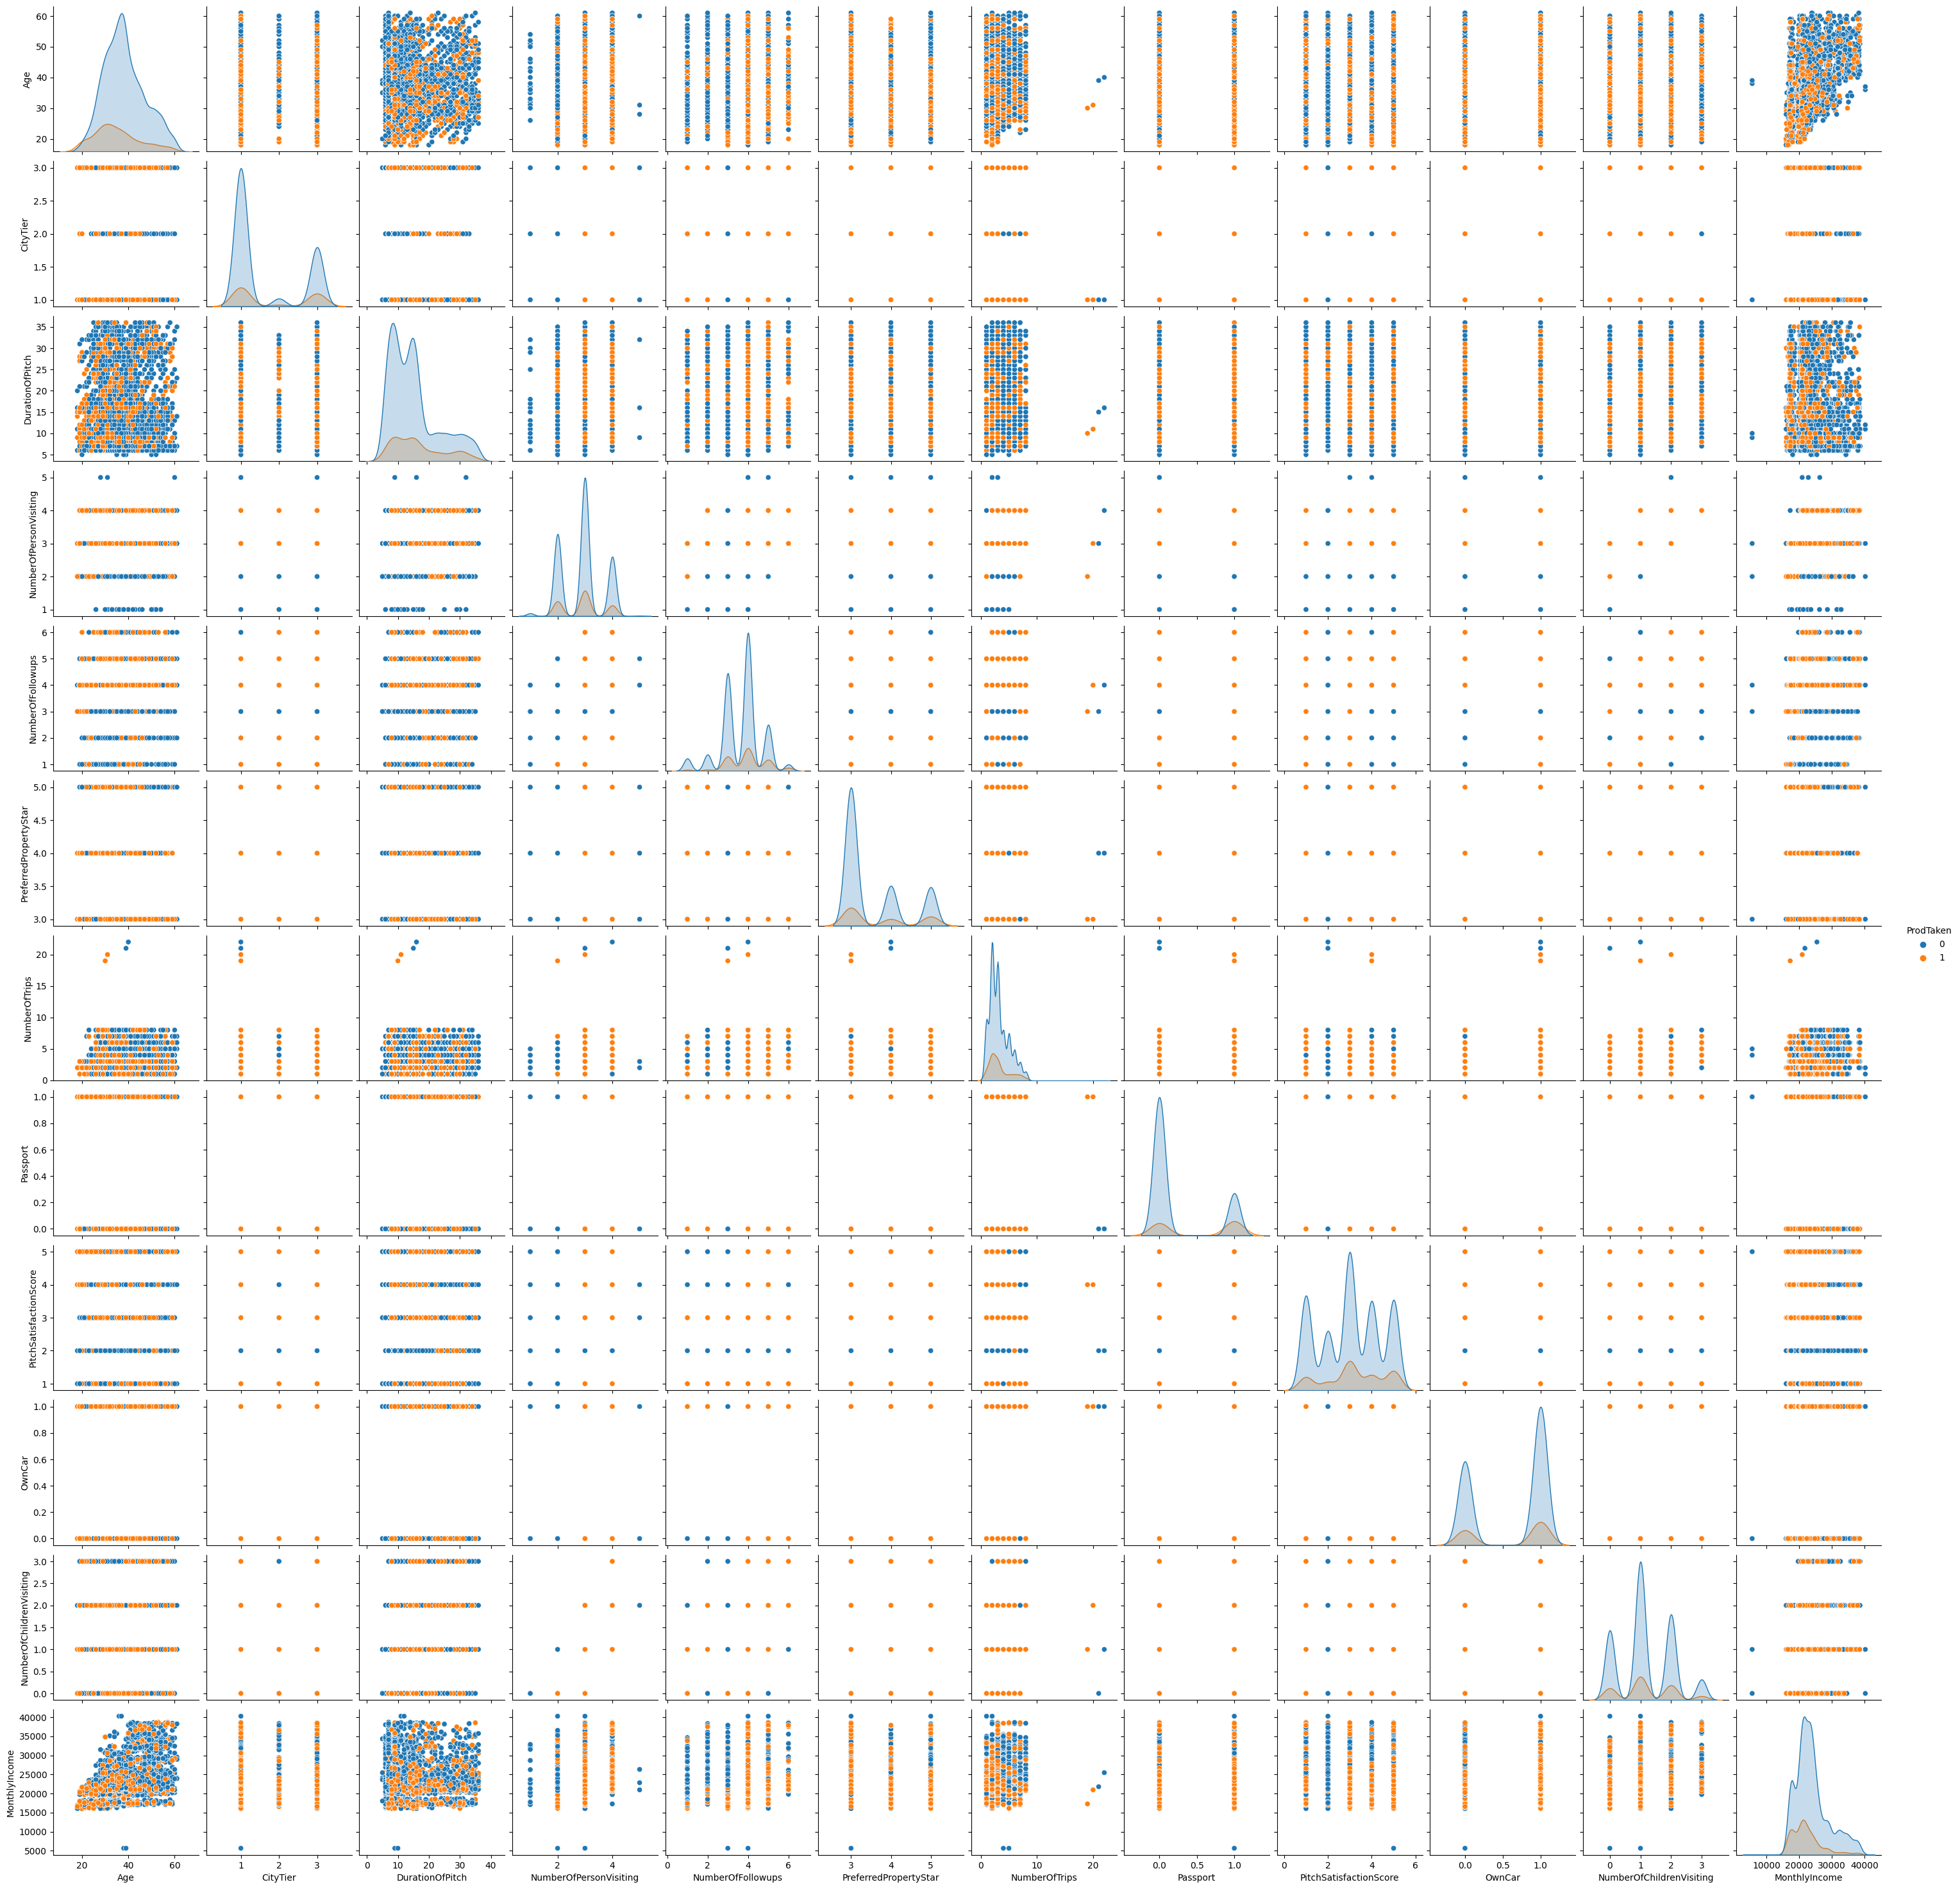

In [72]:
sns.pairplot(copy_df, hue='ProdTaken')

1. As we can see that people are taking products more when they belongs to City Tier 1 & City Tier 2 with high monthly income.
2. 3 Star property are choosen more compared to 4 & 5 star property.

In [73]:
groupby_data = copy_df.groupby('ProductPitched')

In [74]:
product_data = groupby_data.get_group('Basic')
product_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,0.300000,33.427717,1.347826,15.067391,2.930435,3.696196,3.585870,3.095652,0.308696,3.083696,0.588043,1.198913,20051.995652
std,0.458382,8.366873,0.718508,7.671393,0.719153,1.017833,0.792993,1.788910,0.462081,1.352723,0.492321,0.858441,2645.609415
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16009.000000
25%,0.000000,28.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,17685.500000
50%,0.000000,33.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,20766.000000
75%,1.000000,38.000000,1.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,21523.750000
max,1.000000,60.000000,3.000000,36.000000,5.000000,6.000000,5.000000,20.000000,1.000000,5.000000,1.000000,3.000000,40244.000000


In [75]:
product_data = groupby_data.get_group('Standard')
product_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.167116,40.578167,1.800539,15.985175,2.920485,3.791105,3.646900,3.316712,0.283019,3.061995,0.652291,1.177898,26637.749326
std,0.373331,8.367968,0.968101,8.293115,0.733163,0.919588,0.837295,1.798400,0.450769,1.383900,0.476564,0.868179,2797.180737
min,0.000000,19.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17372.000000
25%,0.000000,35.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,24860.000000
50%,0.000000,38.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,26425.000000
75%,0.000000,46.000000,3.000000,21.750000,3.000000,4.000000,4.000000,5.000000,1.000000,4.000000,1.000000,2.000000,28716.000000
max,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,38395.000000


In [76]:
product_data = groupby_data.get_group('Deluxe')
product_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,0.117783,37.411085,1.928406,15.833718,2.891455,3.707275,3.560046,3.281755,0.277136,3.006928,0.610855,1.177252,22728.765300
std,0.322444,7.617112,0.986074,8.004119,0.728076,1.009655,0.791621,1.906616,0.447714,1.363873,0.487697,0.852693,2394.552188
min,0.000000,21.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5665.750000
25%,0.000000,32.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20914.750000
50%,0.000000,37.000000,1.000000,15.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,23135.500000
75%,0.000000,42.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,24085.000000
max,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,38525.000000


In [77]:
product_data = groupby_data.get_group('Super Deluxe')
product_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.058480,48.026316,1.730994,16.230994,2.845029,3.576023,3.578947,3.502924,0.304094,3.356725,0.701754,1.064327,32241.046784
std,0.234992,6.324269,0.949226,9.484167,0.740109,1.029653,0.802066,1.774284,0.460696,1.324791,0.458158,0.804286,2859.687433
min,0.000000,29.000000,1.000000,6.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17705.000000
25%,0.000000,43.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,3.000000,0.000000,1.000000,30847.000000
50%,0.000000,49.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,32181.000000
75%,0.000000,53.000000,3.000000,23.000000,3.000000,4.000000,4.000000,5.000000,1.000000,5.000000,1.000000,2.000000,34787.000000
max,1.000000,60.000000,3.000000,36.000000,4.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,37502.000000


In [78]:
product_data = groupby_data.get_group('King')
product_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.086957,48.065217,1.443478,12.100000,2.847826,3.804348,3.430435,3.221739,0.260870,3.226087,0.721739,1.326087,35878.947826
std,0.282386,6.133173,0.772805,5.764179,0.692044,0.930313,0.706758,1.506451,0.440067,1.423820,0.449120,0.799955,2461.946914
min,0.000000,27.000000,1.000000,5.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17517.000000
25%,0.000000,42.250000,1.000000,8.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,34202.000000
50%,0.000000,49.000000,1.000000,11.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,34999.000000
75%,0.000000,52.750000,2.000000,14.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.750000,1.000000,2.000000,37880.000000
max,1.000000,61.000000,3.000000,33.000000,4.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,38677.000000


Basic Package :-
1. Average duration of pitch is 15 minutes 
2. Average number of member per group is 3. So it will be good for them if they roll out package for 3 members togather in order to increase their sales.
3. On an average, people with their monthly income around 23,000 prefers to travel more.

Standard Package :-
1. More than 50% people are from Tier 1 city.
2. On an average duration of speech is 14 minutes.
3. Average people in this package having 40 age.

Deluxe Package :-
1. average people belongs to age 38.
2. Person who is having 23000 monthly income, prefers this package more.

Super Deluxe Package :-
1. Person with age 48 are more into this package.
2. Average person buying Super Deluxe package has age 49

King Package :- 
1. Almost people with age 50 prefer to buy this package.
2. Also, people are buying this package having monthly income of 35000.

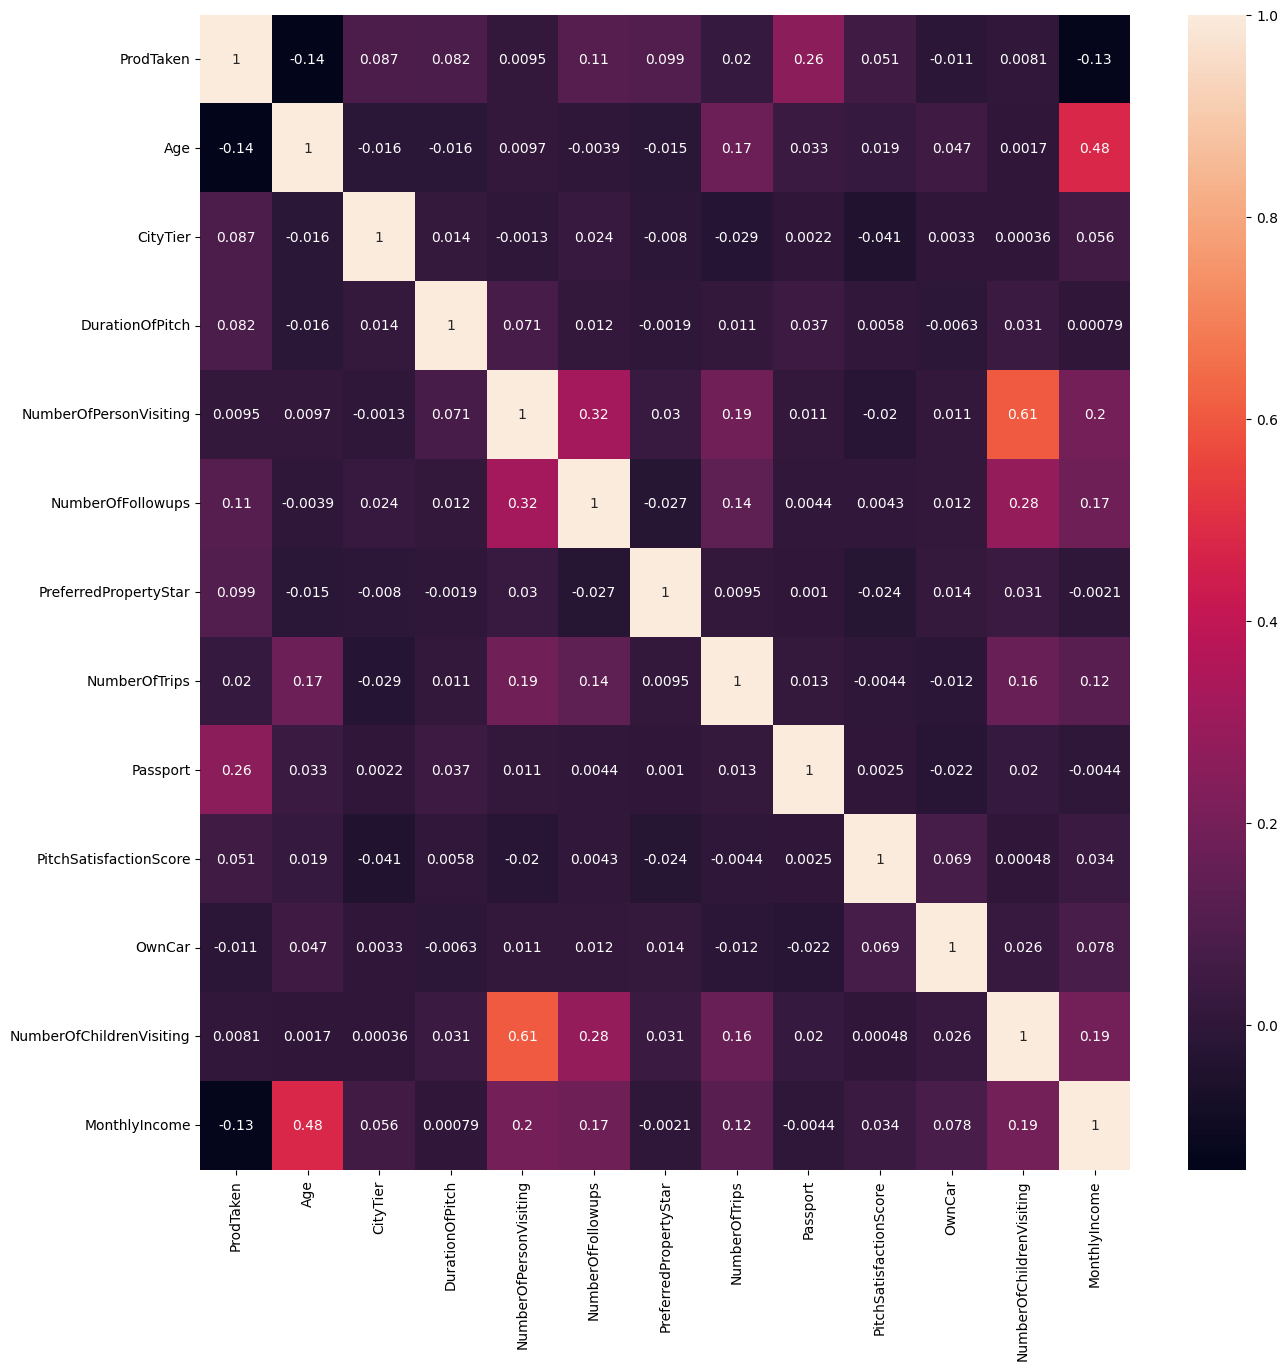

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(copy_df.corr(),annot=True)
plt.show()

1. Number Of Person Visiting has more correlation with number of children visiting and thats true which is it wont affect more with the product buying.
2. There is 25% correlation when having passport of buying product

## Model Building

In [80]:
copy_df.drop(['PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'], axis=1, inplace=True)
X = copy_df.drop('ProdTaken',axis=1)
y = copy_df['ProdTaken']

In [81]:
## missing values was imputed earlier when outliers was imputed because outlier was giving nan values due to few missing values.

In [82]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4886, dtype: int64

In [83]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4886 non-null   int64   
 1   Age                       4886 non-null   float64 
 2   TypeofContact             4861 non-null   category
 3   CityTier                  4886 non-null   int64   
 4   Occupation                4886 non-null   category
 5   Gender                    4886 non-null   category
 6   NumberOfPersonVisiting    4886 non-null   int64   
 7   PreferredPropertyStar     4886 non-null   float64 
 8   MaritalStatus             4886 non-null   category
 9   NumberOfTrips             4886 non-null   float64 
 10  Passport                  4886 non-null   int64   
 11  OwnCar                    4886 non-null   int64   
 12  NumberOfChildrenVisiting  4886 non-null   float64 
 13  Designation               4886 non-null   catego

In [84]:
X = pd.get_dummies(X, columns=['TypeofContact','Occupation','Gender','MaritalStatus','Designation'])

y = y.astype(float)
X['CityTier'] = X['CityTier'].astype(float)
X['NumberOfPersonVisiting'] = X['NumberOfPersonVisiting'].astype(float)
X['Passport'] = X['Passport'].astype(float)
X['OwnCar'] = X['OwnCar'].astype(float)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4886 non-null   float64
 1   CityTier                       4886 non-null   float64
 2   NumberOfPersonVisiting         4886 non-null   float64
 3   PreferredPropertyStar          4886 non-null   float64
 4   NumberOfTrips                  4886 non-null   float64
 5   Passport                       4886 non-null   float64
 6   OwnCar                         4886 non-null   float64
 7   NumberOfChildrenVisiting       4886 non-null   float64
 8   MonthlyIncome                  4886 non-null   float64
 9   TypeofContact_Company Invited  4886 non-null   uint8  
 10  TypeofContact_Self Enquiry     4886 non-null   uint8  
 11  Occupation_Free Lancer         4886 non-null   uint8  
 12  Occupation_Large Business      4886 non-null   u

In [86]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [87]:
X_train

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Company Invited,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2664,37.0,1.0,4.0,4.0,2.0,0.0,0.0,3.0,24592.0,0,...,1,0,0,0,1,0,0,1,0,0
4590,36.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,22692.0,0,...,0,0,1,0,0,0,0,1,0,0
4308,32.0,1.0,3.0,5.0,3.0,0.0,1.0,1.0,22984.0,0,...,0,0,1,0,0,0,0,1,0,0
1071,49.0,1.0,2.0,5.0,5.0,0.0,1.0,1.0,19789.0,0,...,0,1,0,0,0,0,0,1,0,0
4659,56.0,1.0,4.0,4.0,5.0,1.0,1.0,2.0,25063.0,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,34.0,1.0,4.0,5.0,3.0,1.0,1.0,1.0,22026.0,1,...,1,0,0,0,1,0,1,0,0,0
466,41.0,3.0,3.0,5.0,1.0,0.0,1.0,1.0,31595.0,0,...,0,1,0,0,0,1,0,0,0,0
3093,54.0,1.0,4.0,3.0,8.0,0.0,1.0,2.0,32953.0,0,...,0,0,0,1,0,1,0,0,0,0
3773,30.0,2.0,3.0,4.0,3.0,0.0,1.0,2.0,21482.0,0,...,1,0,1,0,0,0,1,0,0,0


In [88]:
print(X_train.shape)
print(y_train.shape)

(3420, 26)
(3420,)


In [153]:
Training_Accuracy = list()
Testing_Accuracy = list()

Training_Recall = list()
Testing_Recall = list()

Training_Precision = list()
Testing_Precision = list()

Training_f1score = list()
Testing_f1score = list()

In [154]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
pred_train = d_tree.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
Training_Accuracy.append(accuracy_score(pred_train, y_train))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
Training_Recall.append(recall_score(pred_train, y_train))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
Training_Precision.append(precision_score(pred_train, y_train))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
Training_f1score.append(f1_score(pred_train, y_train))
print("-"*20)

pred_test = d_tree.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
Testing_Accuracy.append(accuracy_score(pred_test, y_test))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
Testing_Recall.append(recall_score(pred_test, y_test))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
Testing_Precision.append(precision_score(pred_test, y_test))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 1.0
Training Recall Score : 1.0
Training Precision Score : 1.0
Training f1-score Score : 1.0
--------------------
Testing Accuracy : 0.8669849931787176
Testing Recall Score : 0.6382978723404256
Testing Precision Score : 0.6593406593406593
Testing f1-score Score : 0.6486486486486486
[[2773    0]
 [   0  647]]
[[1091   93]
 [ 102  180]]


Decison Tree tends to overfit more as we can prove with the help of train and test accuracy.

In [156]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [157]:
pred_train = random_forest.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
Training_Accuracy.append(accuracy_score(pred_train, y_train))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
Training_Recall.append(recall_score(pred_train, y_train))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
Training_Precision.append(precision_score(pred_train, y_train))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
Training_f1score.append(f1_score(pred_train, y_train))
print("-"*20)

pred_test = random_forest.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
Testing_Accuracy.append(accuracy_score(pred_test, y_test))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
Testing_Recall.append(recall_score(pred_test, y_test))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
Testing_Precision.append(precision_score(pred_test, y_test))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 1.0
Training Recall Score : 1.0
Training Precision Score : 1.0
Training f1-score Score : 1.0
--------------------
Testing Accuracy : 0.8908594815825375
Testing Recall Score : 0.834319526627219
Testing Precision Score : 0.5164835164835165
Testing f1-score Score : 0.6380090497737558
[[2773    0]
 [   0  647]]
[[1165  132]
 [  28  141]]


Random Forest is also overfitting as test accuracy is too low compared to train accuracy.

In [158]:
bagging_classifier_model = BaggingClassifier()
bagging_classifier_model.fit(X_train, y_train)

BaggingClassifier()

In [159]:
pred_train = bagging_classifier_model.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
Training_Accuracy.append(accuracy_score(pred_train, y_train))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
Training_Recall.append(recall_score(pred_train, y_train))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
Training_Precision.append(precision_score(pred_train, y_train))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
Training_f1score.append(f1_score(pred_train, y_train))
print("-"*20)

pred_test = bagging_classifier_model.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
Testing_Accuracy.append(accuracy_score(pred_test, y_test))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
Testing_Recall.append(recall_score(pred_test, y_test))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
Testing_Precision.append(precision_score(pred_test, y_test))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9935672514619883
Training Recall Score : 0.9968203497615262
Training Precision Score : 0.9690880989180835
Training f1-score Score : 0.9827586206896552
--------------------
Testing Accuracy : 0.8969986357435198
Testing Recall Score : 0.8279569892473119
Testing Precision Score : 0.5641025641025641
Testing f1-score Score : 0.6710239651416122
[[2771   20]
 [   2  627]]
[[1161  119]
 [  32  154]]


Bagging Classifier Model is also overfitting as we can train and test accuracy is having difference of 10%

## Tuning Decision Tree Model

In [160]:
tuned_decision_tree = DecisionTreeClassifier(max_depth=10,random_state=42)

params = {'max_depth': [2,8,16,32], 
              'min_samples_leaf': [2,4,6],
              'max_leaf_nodes' : [ 5,10,15,20]
              
             }

grid_obj = GridSearchCV(tuned_decision_tree, params,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

tuned_decision_tree = grid_obj.best_estimator_

tuned_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_leaf=4,
                       random_state=42)

In [161]:
pred_train = tuned_decision_tree.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)
Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = tuned_decision_tree.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))
Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))


confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.8596491228070176
Training Recall Score : 0.6928406466512702
Training Precision Score : 0.46367851622874806
Training f1-score Score : 0.5555555555555556
--------------------
Testing Accuracy : 0.8390177353342428
Testing Recall Score : 0.5948717948717949
Testing Precision Score : 0.4249084249084249
Testing f1-score Score : 0.4957264957264958
[[2640  347]
 [ 133  300]]
[[1114  157]
 [  79  116]]


Decision Tree tuned version gives the best accuracy for the training and testing both so we can consider this model for real time use case.

## Tuning Random Forest

In [162]:
random_forest_tuned = RandomForestClassifier(max_depth=6,random_state=42)

params = { "max_depth":[8,10,12],
               "n_estimators": [200,300,400,500],
               "min_samples_leaf": np.arange(3, 7)
              }

grid = GridSearchCV(random_forest_tuned, params, cv=10,n_jobs=-1)
grid = grid.fit(X_train, y_train)

random_forest_tuned = grid.best_estimator_

random_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=500,
                       random_state=42)

In [163]:
pred_train = random_forest_tuned.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = random_forest_tuned.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9166666666666666
Training Recall Score : 0.9689119170984456
Training Precision Score : 0.5780525502318392
Training f1-score Score : 0.7241045498547919
--------------------
Testing Accuracy : 0.8615279672578445
Testing Recall Score : 0.7868852459016393
Testing Precision Score : 0.3516483516483517
Testing f1-score Score : 0.4860759493670886
[[2761  273]
 [  12  374]]
[[1167  177]
 [  26   96]]


we can say that random forest works better when hyper parameter tuning is done on it.

## Tuning bagging classifier

In [164]:
bagging_classifier_tuned = BaggingClassifier(max_features=0.8,random_state=42)

params = {'max_samples': [0.4,0.6,0.8,1.0], 
              'max_features': [0.2,0.4,0.6,0.8],
              'n_estimators' : [20,30,40,50,60],
             }

grid = GridSearchCV(bagging_classifier_tuned, params,cv=10)
grid = grid.fit(X_train, y_train)

bagging_classifier_tuned = grid.best_estimator_

bagging_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, n_estimators=30, random_state=42)

In [165]:
pred_train = bagging_classifier_tuned.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = bagging_classifier_tuned.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9997076023391813
Training Recall Score : 1.0
Training Precision Score : 0.9984544049459042
Training f1-score Score : 0.9992266047950503
--------------------
Testing Accuracy : 0.8969986357435198
Testing Recall Score : 0.8351648351648352
Testing Precision Score : 0.5567765567765568
Testing f1-score Score : 0.6681318681318682
[[2773    1]
 [   0  646]]
[[1163  121]
 [  30  152]]


In [166]:
Scores_Comparison = pd.DataFrame({'Models':['Decision Tree Classifier',
                                          'Random Forest Classifier',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': Training_Accuracy,'Test_Accuracy': Testing_Accuracy,
                                          'Train_Recall':Training_Recall,'Test_Recall':Testing_Recall,
                                          'Train_Precision':Training_Precision,'Test_Precision':Testing_Precision,
                                          'Train_F1':Training_f1score,
                                          'Test_F1':Testing_f1score  }) 

Scores_Comparison

,Models,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree Classifier,1.000000,0.866985,1.000000,0.638298,1.000000,0.659341,1.000000,0.648649
1,Random Forest Classifier,1.000000,0.890859,1.000000,0.834320,1.000000,0.516484,1.000000,0.638009
2,Bagging Classifier,0.993567,0.896999,0.996820,0.827957,0.969088,0.564103,0.982759,0.671024
3,Tuned Decision Tree,0.859649,0.839018,0.692841,0.594872,0.463679,0.424908,0.555556,0.495726
4,Tuned Random Forest,0.916667,0.861528,0.968912,0.786885,0.578053,0.351648,0.724105,0.486076
5,Tuned Bagging Classifier,0.999708,0.896999,1.000000,0.835165,0.998454,0.556777,0.999227,0.668132


## Trying for different alpha values

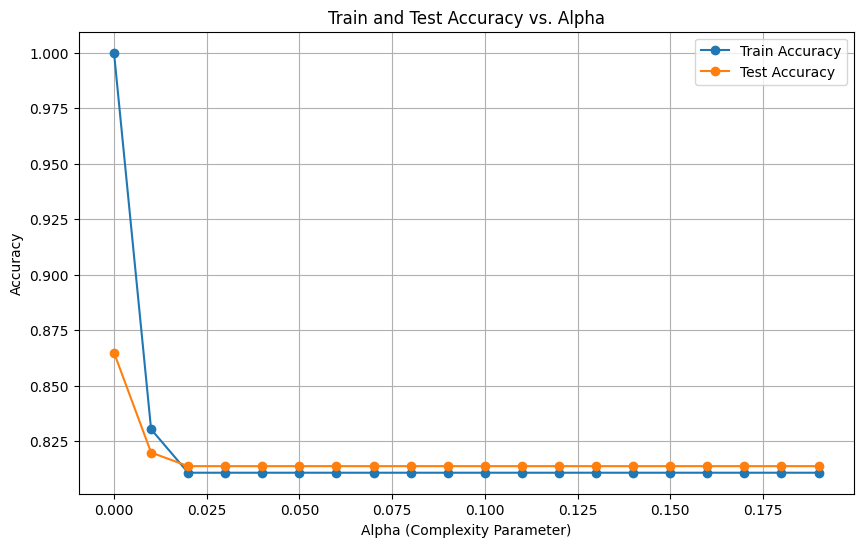

Best Alpha: 0.0
Classification Report for the Best Model:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1193
         1.0       0.64      0.64      0.64       273

    accuracy                           0.86      1466
   macro avg       0.78      0.78      0.78      1466
weighted avg       0.87      0.86      0.87      1466



In [167]:
# Initialize arrays to store results
alphas = []
train_accuracies = []
test_accuracies = []

# Range of alpha values to test
for alpha in np.arange(0.0, 0.2, 0.01):
    alphas.append(alpha)
    
    # Create the Decision Tree Classifier with specified alpha
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Visualize the performance
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(alphas, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Alpha (Complexity Parameter)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Find the best alpha
best_alpha = alphas[np.argmax(test_accuracies)]
print(f'Best Alpha: {best_alpha}')

# Train a model with the best alpha
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print performance metrics
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred))

Even also trying out with different alpha values, we couldn't find out the best version of decision tree. Only it worked well when we performed hyper parameter tuning on the model.

## Building XGBoost performance classifier and metrics

In [168]:
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [169]:
pred_train = xgboost_classifier.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = xgboost_classifier.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9985380116959064
Training Recall Score : 1.0
Training Precision Score : 0.9922720247295209
Training f1-score Score : 0.996121024049651
--------------------
Testing Accuracy : 0.8942701227830833
Testing Recall Score : 0.780952380952381
Testing Precision Score : 0.6007326007326007
Testing f1-score Score : 0.6790890269151139
[[2773    5]
 [   0  642]]
[[1147  109]
 [  46  164]]


In [170]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [171]:
pred_train = adaboost_classifier.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = adaboost_classifier.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.8476608187134503
Training Recall Score : 0.7266187050359713
Training Precision Score : 0.312210200927357
Training f1-score Score : 0.4367567567567568
--------------------
Testing Accuracy : 0.8410641200545702
Testing Recall Score : 0.6724137931034483
Testing Precision Score : 0.2857142857142857
Testing f1-score Score : 0.4010282776349614
[[2697  445]
 [  76  202]]
[[1155  195]
 [  38   78]]


In [172]:
gradient_boost_classifier = GradientBoostingClassifier()
gradient_boost_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [173]:
pred_train = gradient_boost_classifier.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)


Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = gradient_boost_classifier.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))


confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.8862573099415205
Training Recall Score : 0.8623595505617978
Training Precision Score : 0.47449768160741884
Training f1-score Score : 0.6121635094715852
--------------------
Testing Accuracy : 0.8519781718963165
Testing Recall Score : 0.6891891891891891
Testing Precision Score : 0.37362637362637363
Testing f1-score Score : 0.48456057007125897
[[2724  340]
 [  49  307]]
[[1147  171]
 [  46  102]]


## Tuning ada boost classifier

In [174]:
adaboost_tuned = AdaBoostClassifier(random_state=42,learning_rate=0.1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5)],
    "n_estimators": np.arange(20,40,60),
    "learning_rate":np.arange(0.1,0.2,0.3)
}

grid = GridSearchCV(adaboost_tuned, parameters,cv=10)
grid = grid.fit(X_train, y_train)

adaboost_tuned = grid.estimator

adaboost_tuned.fit(X_train, y_train)

C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\envs\general_func\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

AdaBoostClassifier(learning_rate=0.1, random_state=42)

In [175]:
pred_train = adaboost_tuned.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = adaboost_tuned.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.8192982456140351
Training Recall Score : 0.8918918918918919
Training Precision Score : 0.05100463678516229
Training f1-score Score : 0.09649122807017543
--------------------
Testing Accuracy : 0.8233287858117326
Testing Recall Score : 0.9375
Testing Precision Score : 0.054945054945054944
Testing f1-score Score : 0.10380622837370242
[[2769  614]
 [   4   33]]
[[1192  258]
 [   1   15]]


## Tuning gradient classifier

In [176]:
gradient_boost_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),random_state=42)

params = {
    "n_estimators": [20,30,40,50],
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.5,0.7,1]
}

grid = GridSearchCV(gradient_boost_tuned, params, cv=10)
grid = grid.fit(X_train, y_train)

gradient_boost_tuned = grid.estimator

gradient_boost_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=42),
                           random_state=42)

In [177]:
pred_train = gradient_boost_tuned.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = gradient_boost_tuned.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))

confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.8830409356725146
Training Recall Score : 0.8559077809798271
Training Precision Score : 0.45904173106646057
Training f1-score Score : 0.5975855130784709
--------------------
Testing Accuracy : 0.8519781718963165
Testing Recall Score : 0.6917808219178082
Testing Precision Score : 0.36996336996337
Testing f1-score Score : 0.4821002386634846
[[2723  350]
 [  50  297]]
[[1148  172]
 [  45  101]]


## Tuned XGBoost Classifier

In [178]:
XGBoost_Tuned = XGBClassifier(random_state=42)

params = {
    "n_estimators": np.arange(20,40,60),
    "learning_rate":[0.1,0.2,0.3,0.4]
}

grid = GridSearchCV(XGBoost_Tuned, params,cv=10,n_jobs=-1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
XGBoost_Tuned = grid.best_estimator_

XGBoost_Tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [179]:
pred_train = XGBoost_Tuned.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = XGBoost_Tuned.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))


confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9450292397660819
Training Recall Score : 0.9636363636363636
Training Precision Score : 0.7372488408037094
Training f1-score Score : 0.8353765323992994
--------------------
Testing Accuracy : 0.8676671214188267
Testing Recall Score : 0.7309941520467836
Testing Precision Score : 0.45787545787545786
Testing f1-score Score : 0.5630630630630631
[[2755  170]
 [  18  477]]
[[1147  148]
 [  46  125]]


Now we are going to build Stack Classifier in which we will use different tuned model.

In [180]:
no_of_estimators=[('Decision Tree', tuned_decision_tree),('Random Forest', random_forest_tuned),('AdaBoost',adaboost_tuned),
           ('Gradient Boosting', gradient_boost_tuned)]
final_estimator=XGBClassifier(random_state=42)

In [181]:
stacking=StackingClassifier(estimators=no_of_estimators, final_estimator=final_estimator,cv=10,n_jobs=-1)
stacking.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=8,
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=4,
                                                       random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=12,
                                                       min_samples_leaf=3,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('AdaBoost',
                                AdaBoostClassifier(learning_rate=0.1,
                                                   random_state=42)),
                               ('Gradient Boosting',
                                GradientBoosti...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...),
                   n_jobs=-1)

In [182]:
pred_train = stacking.predict(X_train)
print("Training Accuracy : {}".format(accuracy_score(pred_train, y_train)))
print("Training Recall Score : {}".format(recall_score(pred_train, y_train)))
print("Training Precision Score : {}".format(precision_score(pred_train, y_train)))
print("Training f1-score Score : {}".format(f1_score(pred_train, y_train)))
print("-"*20)

Training_Accuracy.append(accuracy_score(pred_train, y_train))
Training_Recall.append(recall_score(pred_train, y_train))
Training_Precision.append(precision_score(pred_train, y_train))
Training_f1score.append(f1_score(pred_train, y_train))

pred_test = stacking.predict(X_test)
print("Testing Accuracy : {}".format(accuracy_score(pred_test, y_test)))
print("Testing Recall Score : {}".format(recall_score(pred_test, y_test)))
print("Testing Precision Score : {}".format(precision_score(pred_test, y_test)))
print("Testing f1-score Score : {}".format(f1_score(pred_test, y_test)))

Testing_Accuracy.append(accuracy_score(pred_test, y_test))
Testing_Recall.append(recall_score(pred_test, y_test))
Testing_Precision.append(precision_score(pred_test, y_test))
Testing_f1score.append(f1_score(pred_test, y_test))


confusion_matrix1 = confusion_matrix(pred_train,y_train)

confusion_matrix2 = confusion_matrix(pred_test,y_test)
print("="*20)
print(confusion_matrix1)
print("="*20)
print(confusion_matrix2)
print("="*20)

Training Accuracy : 0.9695906432748538
Training Recall Score : 0.938610662358643
Training Precision Score : 0.8979907264296755
Training f1-score Score : 0.9178515007898895
--------------------
Testing Accuracy : 0.8649386084583902
Testing Recall Score : 0.669683257918552
Testing Precision Score : 0.5421245421245421
Testing f1-score Score : 0.5991902834008096
[[2735   66]
 [  38  581]]
[[1120  125]
 [  73  148]]


Now comparing all the models:
1. Decision Tree
2. Decision Tree Tuned
3. Random Forest Classifier
4. Random Forest Classifier Tuned
5. Bagging Classifier
6. Bagging Classifier Tuned
7. Adaboost Classifier
8. Adaboost Classifier Tuned
9. Gradient Boost Classifier
10. Gradient Boost Classifier Tuned
11. XGBoost Classifier
12. XGBoost Classifier Tuned
13. Stacking Classifier

In [183]:
Final_Comparison_Of_Models = pd.DataFrame({'Models':['Decision Tree',
                                            'Random Forest',
                                            'bagging classifier',
                                            'Decision Tree Tuned',
                                            'Random Forest Tuned',
                                            'Bagging Tuned',
                                            'XGBoost Classifier',
                                            'Adaboost Classifier',
                                            'Gradient Classifier',
                                            'AdaBoost Classifier Tuned',
                                            'Gradient Boost Tuned',
                                            'XGBoost Classifier Tuned',
                                            'Stacking Classifier'], 
                                          'Train_Accuracy': Training_Accuracy,'Test_Accuracy': Testing_Accuracy,
                                          'Train_Recall':Training_Recall,'Test_Recall':Testing_Recall,
                                          'Train_Precision':Training_Precision,'Test_Precision':Testing_Precision,
                                          'Train_F1':Training_f1score,
                                          'Test_F1':Testing_f1score  }) 

Final_Comparison_Of_Models



,Models,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.866985,1.000000,0.638298,1.000000,0.659341,1.000000,0.648649
1,Random Forest,1.000000,0.890859,1.000000,0.834320,1.000000,0.516484,1.000000,0.638009
2,bagging classifier,0.993567,0.896999,0.996820,0.827957,0.969088,0.564103,0.982759,0.671024
3,Decision Tree Tuned,0.859649,0.839018,0.692841,0.594872,0.463679,0.424908,0.555556,0.495726
4,Random Forest Tuned,0.916667,0.861528,0.968912,0.786885,0.578053,0.351648,0.724105,0.486076
5,Bagging Tuned,0.999708,0.896999,1.000000,0.835165,0.998454,0.556777,0.999227,0.668132
6,XGBoost Classifier,0.998538,0.894270,1.000000,0.780952,0.992272,0.600733,0.996121,0.679089
7,Adaboost Classifier,0.847661,0.841064,0.726619,0.672414,0.312210,0.285714,0.436757,0.401028
8,Gradient Classifier,0.886257,0.851978,0.862360,0.689189,0.474498,0.373626,0.612164,0.484561
9,AdaBoost Classifier Tuned,0.819298,0.823329,0.891892,0.937500,0.051005,0.054945,0.096491,0.103806


1. Adaboost Classifier tuned is perfect fitting to the given dataset. 
2. Decision Tree tuned version is also better but not better than ada boost .
3. Stacking Classifier score says that it is overfitting

## Detailed and Useful Business Recommendation

1.  First of all, Salaried people should be given more priority as they are more towards taking trip a year.
2.  Person having Executive designation, is more willing to take a trip, than any other designation.
3.  Basic Package should is taken more by people working at any designation.
4.  People with the age range of 40 to 50 should be targetted more.
5.  Customers with the monthly income of 20,000 to 40,000 aree more in the historical dataset.
6.  3 Star property should be more promoted more as customers are preferring this type of property more.
7.  Freelancer should be ignore and not more amount of finance should be spend behind them as they are not more giving more           profit to the company as per the dataset.
8.  Family who has single children should be more focused.
9.  Pitch Satisfaction score to be targetted to gain 3 for increasing buying product ratio (i.e. success of product).
10. People who belongs to City Tier 1 & City Tier 2 are buying this product more and more as compared to people from City Tier 3     .